C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29548\1683497704.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded[col].fillna(df_encoded[col].mean(), inplace=True)


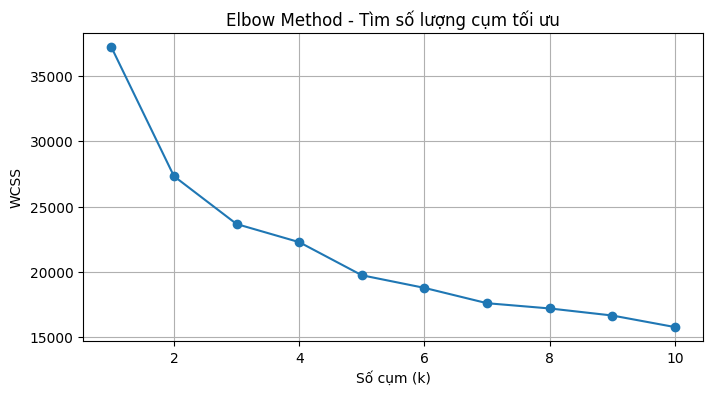

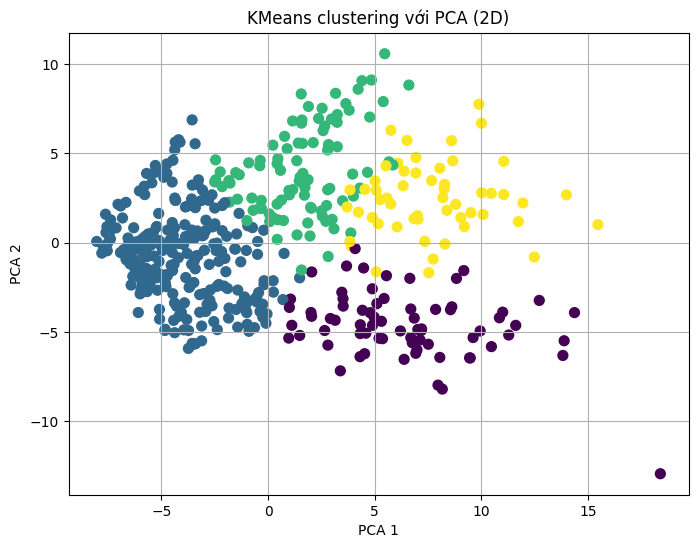

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA


df_final_sorted = pd.read_csv('result.csv')
df = df_final_sorted.copy()


df_encoded = df.copy()

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

for col in df_encoded.select_dtypes(include=['number']).columns:
    df_encoded[col].fillna(df_encoded[col].mean(), inplace=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method - Tìm số lượng cụm tối ưu')
plt.xlabel('Số cụm (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('KMeans clustering với PCA (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

